Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings(action='ignore')

Data Collection & Pre-Processing

In [ ]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv("C:\\Users\\vvrn_\\Downloads\\mail_data.csv")

In [ ]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [ ]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


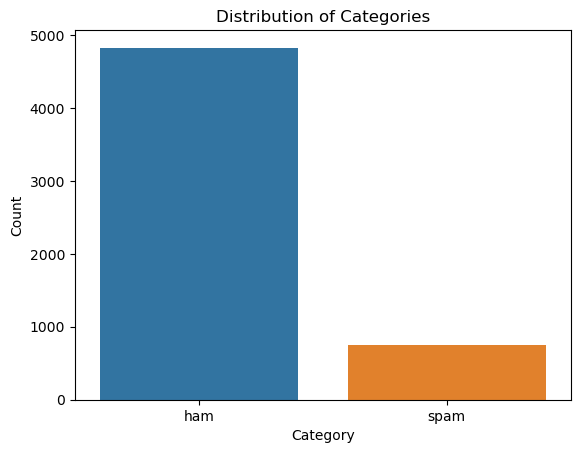

In [ ]:
sns.countplot(x='Category', data=mail_data)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



In [ ]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

Label Encoding

In [ ]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [ ]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into training data & test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [ ]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train)

3890                    Unlimited texts. Limited minutes.
5553                          Hahaha..use your brain dear
4366    Ujhhhhhhh computer shipped out with address to...
3968    YOU HAVE WON! As a valued Vodafone customer ou...
3771    Love it! The girls at the office may wonder wh...
                              ...                        
3335    That's fine, have him give me a call if he kno...
1099    NO GIFTS!! You trying to get me to throw mysel...
2514    U have won a nokia 6230 plus a free digital ca...
3606                      Jordan got voted out last nite!
2575    Your next amazing xxx PICSFREE1 video will be ...
Name: Message, Length: 4457, dtype: object


In [ ]:
print(X_train_features)

  (0, 4334)	0.42941702167641554
  (0, 3958)	0.6161071828926097
  (0, 6586)	0.44333254982109394
  (0, 6927)	0.48935591439341625
  (1, 2121)	0.3573617143022146
  (1, 1428)	0.5869421390016223
  (1, 6971)	0.42812434651556874
  (1, 3168)	0.5869421390016223
  (2, 5115)	0.3408491178137899
  (2, 7353)	0.31988118061968496
  (2, 3852)	0.3408491178137899
  (2, 4884)	0.35749230587184955
  (2, 5695)	0.35749230587184955
  (2, 806)	0.26730249393705324
  (2, 5894)	0.35749230587184955
  (2, 1876)	0.28751725124107325
  (2, 6878)	0.35749230587184955
  (3, 197)	0.36522237107066735
  (3, 3723)	0.16297045459835785
  (3, 2435)	0.26698378141852
  (3, 1825)	0.26858331513730566
  (3, 5231)	0.2266831802864503
  (3, 300)	0.2915969875465198
  (3, 7248)	0.23571908490908416
  (3, 5005)	0.3169028431039865
  :	:
  (4454, 2244)	0.2526916142542512
  (4454, 666)	0.28653660324238944
  (4454, 1575)	0.20946314330145205
  (4454, 1094)	0.24862733340971144
  (4454, 5068)	0.22284357632450164
  (4454, 311)	0.19547195974237946
  

Model comparison

In [ ]:
models = {
    "Random Forest": {"model":RandomForestClassifier(), "perf":0},
    "MultinomialNB": {"model":MultinomialNB(), "perf":0},
    "Logistic Regr.": {"model":LogisticRegression(), "perf":0},
    "KNN": {"model":KNeighborsClassifier(), "perf":0},
    "Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},
    "SVM (Linear)": {"model":LinearSVC(), "perf":0},
    "SVM (RBF)": {"model":SVC(), "perf":0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train_features, Y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

Random Forest        trained in 4.57 sec
MultinomialNB        trained in 0.01 sec
Logistic Regr.       trained in 0.14 sec
KNN                  trained in 0.0 sec
Decision Tree        trained in 1.03 sec
SVM (Linear)         trained in 0.01 sec
SVM (RBF)            trained in 1.5 sec


In [ ]:
models_acc = []
for name, model in models.items():
    models_acc.append([name, model["model"].score(X_test_features, Y_test),model["perf"]])

In [ ]:
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy w/o scaling', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy w/o scaling', ascending = False, inplace=True)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy w/o scaling,Training time (sec)
0,SVM (Linear),0.982063,0.01
1,Random Forest,0.974888,4.57
2,SVM (RBF),0.973094,1.50
3,Decision Tree,0.968610,1.03
4,MultinomialNB,0.961435,0.01
5,Logistic Regr.,0.952466,0.14
6,KNN,0.898655,0.00


Training the model using SVM(Linear)

In [ ]:
model = LinearSVC()

In [ ]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LinearSVC()

Evaluating the trained model

In [ ]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9995512676688355


In [ ]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
Precision_on_test_data= precision_score(Y_test, prediction_on_test_data)
Recall_on_test_data = recall_score(Y_test, prediction_on_test_data)
F1_on_test_data = f1_score(Y_test, prediction_on_test_data)
Confusion_Matrix =  confusion_matrix(Y_test, prediction_on_test_data)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data)
print('Precision on test data : ', Precision_on_test_data)
print('Recall on test data : ', Recall_on_test_data)
print('F1 score on test data : ', F1_on_test_data)
print('Confusion Matrix on test data :\n ', Confusion_Matrix)

Accuracy on test data :  0.9820627802690582
Precision on test data :  0.9815005138746146
Recall on test data :  0.9979101358411703
F1 score on test data :  0.9896373056994818
Confusion Matrix on test data :
  [[140  18]
 [  2 955]]


Building a Predictive System

In [ ]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail
